# Logistic Regression 

We have data and are seeking to determine the reasons why people are leaving the company. We have survey data available. Using logistic regression, we aim to uncover the answers.

In [1]:
import pandas as pd 

df= pd.read_csv('HR_comma_sep.csv')
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
list1= df['Department'].unique()
list1

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [8]:
from sklearn.preprocessing import LabelEncoder
le_dep = LabelEncoder()
le_salary = LabelEncoder()

In [9]:
df['Department_n'] = le_dep.fit_transform(df['Department'])
df['salary_n'] = le_salary.fit_transform(df['salary'])

In [11]:
df1 = df.drop(columns={'Department' , 'salary'})
df1

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_n,salary_n
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,8,1
14995,0.37,0.48,2,160,3,0,1,0,8,1
14996,0.37,0.53,2,143,3,0,1,0,8,1
14997,0.11,0.96,6,280,4,0,1,0,8,1


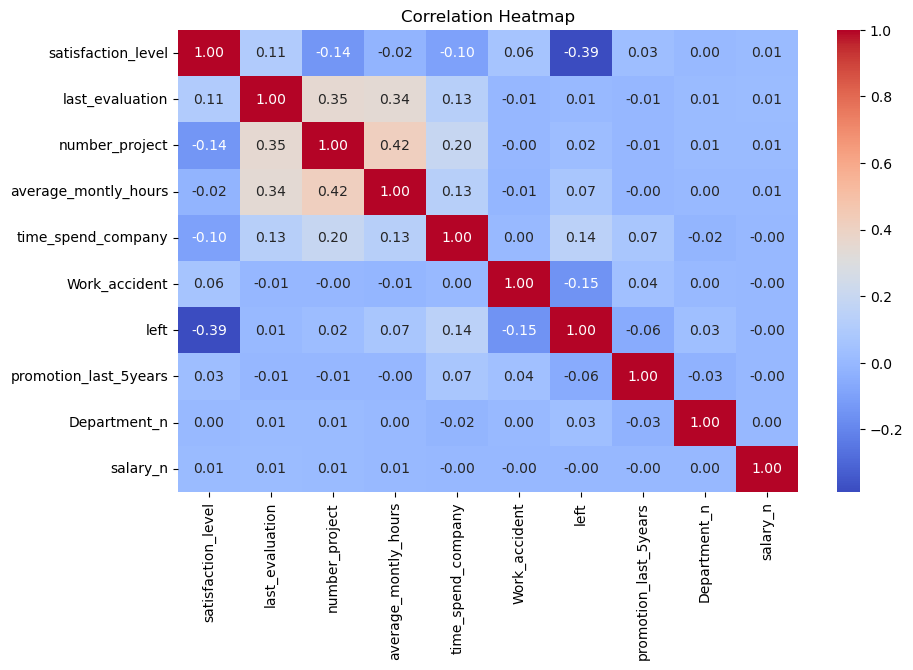

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df1.corr()

# Plotting correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

We found a higher correlation with the following columns, so we have decided to use them exclusively instead of other columns:

- Satisfaction Level 

- Time Spent with the Company

- Work Accident

- Average Monthly Hours

- Promotion in the Last 5 Years

- Salary Level (represented as salary_n)

In [17]:


df2 = df1[['satisfaction_level' , 'time_spend_company' , 'Work_accident' , 'average_montly_hours','promotion_last_5years','salary_n' , 'left']]
df2

,satisfaction_level,time_spend_company,Work_accident,average_montly_hours,promotion_last_5years,salary_n,left
0,0.38,3,0,157,0,1,1
1,0.80,6,0,262,0,2,1
2,0.11,4,0,272,0,2,1
3,0.72,5,0,223,0,1,1
4,0.37,3,0,159,0,1,1
...,...,...,...,...,...,...,...
14994,0.40,3,0,151,0,1,1
14995,0.37,3,0,160,0,1,1
14996,0.37,3,0,143,0,1,1
14997,0.11,4,0,280,0,1,1


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2.drop(columns=['left']) ,df2.left,train_size=0.2)

In [30]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [31]:
model.fit(X_train, y_train)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:

model.score(X_test,y_test)

0.7645833333333333